In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

!pip install Prophet

# prophet by Facebook
from prophet import Prophet
!pip install Prophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#train = pd.read_csv("/home/giuseppe/Downloads/Solar_Energy_Production.csv", parse_dates = True, index_col='date')
train = pd.read_csv("/content/drive/MyDrive/Solar_Energy_Production (1).csv", parse_dates = True, index_col='date')

train.shape


# Data Exploration

In [ ]:
# check the shape and preview the data
print(train.shape)
train.groupby('name').head()

(301231, 7)


,name,id,address,kWh,public_url,installationDate,uid
date,,,,,,,
2017-09-11 08:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 08:00:00
2017-09-11 09:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 09:00:00
2017-09-11 10:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 10:00:00
2017-09-11 11:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 11:00:00
2017-09-11 12:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 12:00:00
2017-09-16 19:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,5.720,https://monitoring.solaredge.com/solaredge-web...,2016/12/13,3190862017-09-16 19:00:00
2017-09-17 07:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,6.717,https://monitoring.solaredge.com/solaredge-web...,2016/12/13,3190862017-09-17 07:00:00
2017-09-17 08:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,60.747,https://monitoring.solaredge.com/solaredge-web...,2016/12/13,3190862017-09-17 08:00:00
2017-09-17 09:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,134.632,https://monitoring.solaredge.com/solaredge-web...,2016/12/13,3190862017-09-17 09:00:00


In [ ]:
# describe the data
train.describe()


,id,kWh
count,301231.000000,301231.000000
mean,374529.153288,865.387971
std,130829.086281,10656.927640
min,164440.000000,0.000000
25%,314106.000000,1.626000
50%,331901.000000,9.203000
75%,551172.000000,47.902500
max,594148.000000,423471.000000


In [ ]:
# describe the data
train.describe(include='O')

,name,address,public_url,installationDate,uid
count,301231,301231,301231,301231,301231
unique,11,11,22,11,301231
top,Southland Leisure Centre,2000 SOUTHLAND DR SW,https://monitoringpublic.solaredge.com/solared...,2015/09/01,3141062017-09-11 08:00:00
freq,36244,36244,29068,36244,1


In [ ]:
# are there missing values?
train.isnull().sum()

name                0
id                  0
address             0
kWh                 0
public_url          0
installationDate    0
uid                 0
dtype: int64

- date: date and time of information collection
- name: name of the place where the data was collected
- id: id of the place where the data was collected
- address:the physical location of the place where the data was collected
- kWh:energy production for a specific date and time
- public_url:contains a URL (Uniform Resource Locator) pointing to the webpage of the place
- installationDate:Represents the date on which the service was became operational.
- uid: this field is likely used to uniquely identify each record in the dataset.

In [ ]:
# since is redundant, we can drop the column 'uid'
# drop column uid
train.drop(columns=['uid'], inplace=True)
train.head(100)

,name,id,address,kWh,public_url,installationDate
date,,,,,,
2017-09-11 08:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07
2017-09-11 09:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07
2017-09-11 10:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07
2017-09-11 11:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07
2017-09-11 12:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07
...,...,...,...,...,...,...
2017-09-18 12:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,168.021,https://monitoring.solaredge.com/solaredge-web...,2016/12/13
2017-09-18 13:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,100.410,https://monitoring.solaredge.com/solaredge-web...,2016/12/13
2017-09-18 14:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,222.311,https://monitoring.solaredge.com/solaredge-web...,2016/12/13


In [ ]:
# we can also drop the column public_url
train.drop(columns=['public_url'], inplace=True)
train.head(100)

,name,id,address,kWh,installationDate
date,,,,,
2017-09-11 08:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,1.130,2016/11/07
2017-09-11 09:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2.340,2016/11/07
2017-09-11 10:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,3.656,2016/11/07
2017-09-11 11:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,4.577,2016/11/07
2017-09-11 12:00:00,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,6.506,2016/11/07
...,...,...,...,...,...
2017-09-18 12:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,168.021,2016/12/13
2017-09-18 13:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,100.410,2016/12/13
2017-09-18 14:00:00,Whitehorn Multi-Service Centre,319086,3705 35 ST NE,222.311,2016/12/13


In [ ]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week

train['kWh'].describe()


count    301231.000000
mean        865.387971
std       10656.927640
min           0.000000
25%           1.626000
50%           9.203000
75%          47.902500
max      423471.000000
Name: kWh, dtype: float64

On average energy production facilities produce 865.38 kWh but in some days they produce 0


In [ ]:
# see if there are values that does not have sense like: year of installation greater than date of recording
train[train['installationDate'] > train.index]


,name,id,address,kWh,public_url,installationDate,uid,Year,Month,Day,WeekOfYear
date,,,,,,,,,,,
2017-11-19 08:00:00,Telus Spark,594148,220 ST GEORGES DR NE,0.302,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-19 08:00:00,2017,11,19,46
2017-11-19 09:00:00,Telus Spark,594148,220 ST GEORGES DR NE,1.814,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-19 09:00:00,2017,11,19,46
2017-11-19 10:00:00,Telus Spark,594148,220 ST GEORGES DR NE,3.734,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-19 10:00:00,2017,11,19,46
2017-11-19 11:00:00,Telus Spark,594148,220 ST GEORGES DR NE,10.200,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-19 11:00:00,2017,11,19,46
2017-11-19 12:00:00,Telus Spark,594148,220 ST GEORGES DR NE,8.991,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-19 12:00:00,2017,11,19,46
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26 15:00:00,Telus Spark,594148,220 ST GEORGES DR NE,1.562,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-26 15:00:00,2017,11,26,47
2017-11-26 16:00:00,Telus Spark,594148,220 ST GEORGES DR NE,0.091,https://monitoring.solaredge.com/solaredge-web...,2017/11/27,5941482017-11-26 16:00:00,2017,11,26,47
2017-10-05 13:15:00,Manchester Building M,570079,651M 25 AV SE,15.521,https://monitoring.solaredge.com/solaredge-web...,2017/10/23,5700792017-10-05 13:15:00,2017,10,5,40


These 75 rows contain an error in the installationDate or in Date of recording, to be sure to not include errors in our analysis we can remove them

In [ ]:
rows_to_be_removed = train[train['installationDate'] > train.index].index
train.drop(rows_to_be_removed,inplace= True)
train[train['installationDate'] > train.index]

,name,id,address,kWh,public_url,installationDate,uid,Year,Month,Day,WeekOfYear
date,,,,,,,,,,,


In [ ]:
# we saw that values for Telus Spark are strange, let's investigate more
train.groupby('name').Month.describe()
# there are too few records for Telus Spark to include it in the analysis , we drop all the Telus Spark rows
rows_to_be_removed = train[train['name'] == 'Telus Spark'].index
train.drop(rows_to_be_removed,inplace= True)
train[train['name'] == 'Telus Spark']

,name,id,address,kWh,public_url,installationDate,uid,Year,Month,Day,WeekOfYear
date,,,,,,,,,,,


In [ ]:
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

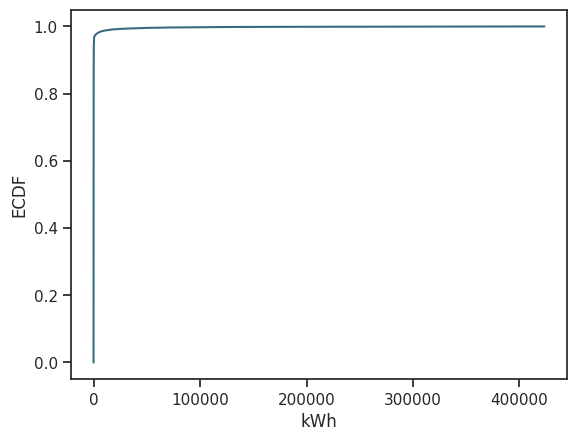

In [ ]:
cdf = ECDF(train['kWh'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('kWh'); plt.ylabel('ECDF');

the graph shows that the the percentage of kWh values grater than zero is close to the 100%



In [ ]:
# check the percentage of records with kWh equal to zero
print('percentage of zero kWh values', train[train['kWh'] == 0].shape[0]/train.shape[0] , '%')

# check the percentage of records with kWh equal or less than the average
print('percentage of kWh values less than the average', train[train['kWh'] <= 865.387].shape[0]/train.shape[0] , '%')


percentage of zero kWh values 0.004034895304025839 %
percentage of kWh values less than the average 0.9705046805456332 %


these values confirm what the graph shows, the number of records with kWh equal to zero is 0.004%
There is a great difference between the average and the standard deviation, this can suggest us a presence of outliers. The goal is to understand why there are days in which the energy facilties have not produced anything and why there are days in which they production was way higher than the average

In [ ]:
train.groupby('Month').kWh.describe()


,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,16812.0,1127.893244,11557.391315,0.0,0.56300,3.3280,20.58575,374445.000
2,16769.0,4106.995014,28765.084394,0.0,0.41500,4.1740,31.90500,423471.000
3,23829.0,46.573010,173.355294,0.0,1.41700,8.0790,37.23100,8392.000
4,28155.0,46.091425,80.583926,0.0,2.37650,11.7010,51.20950,514.402
5,32823.0,44.889529,75.847225,0.0,2.85400,12.2160,53.24850,514.341
6,32413.0,45.989897,76.428268,0.0,2.91100,12.5840,56.44900,514.270
7,33358.0,48.052555,78.165340,0.0,3.00525,13.1245,60.65400,514.251
8,30818.0,45.430867,73.130144,0.0,2.99000,12.6150,57.71250,482.519
9,26994.0,787.557145,9069.130542,0.0,2.70900,11.7200,55.22550,309787.000


from this table we see with surprise that the months with greater average of kWh production are the coldest one

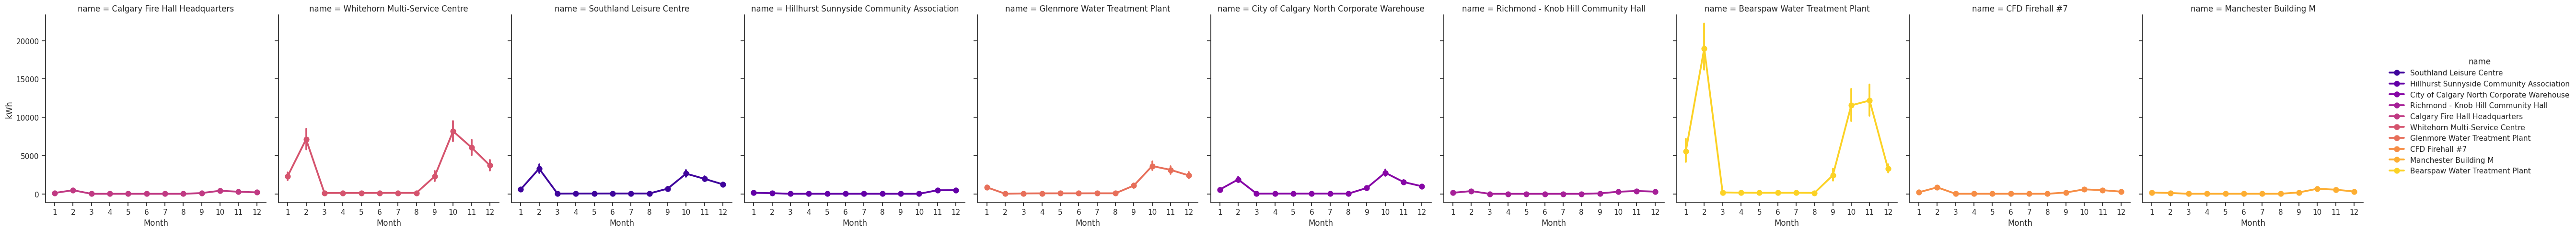

In [ ]:
# kWh production trends
sns.catplot(data = train, x = 'Month', y = "kWh", palette ='plasma', col = 'name', hue = 'name',
             color = c, kind='point') # per store type in cols
plt.show()

In [ ]:
train.groupby('name').kWh.describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Bearspaw Water Treatment Plant,29210.0,3827.402358,28141.611895,0.001,10.99500,69.0765,221.45125,423471.000
CFD Firehall #7,27021.0,174.312336,1182.624173,0.001,1.01700,5.2870,15.22800,17908.000
Calgary Fire Hall Headquarters,29954.0,102.228332,750.952155,0.001,0.60600,2.9780,8.66675,12830.000
City of Calgary North Corporate Warehouse,31502.0,585.226570,4541.602670,0.001,3.57625,20.3470,57.61900,84312.000
Glenmore Water Treatment Plant,29751.0,772.268852,6190.886842,0.001,5.55400,35.9200,105.99800,119464.000
Hillhurst Sunnyside Community Association,24916.0,69.498201,580.679034,0.001,1.04200,5.6525,15.15525,15505.000
Manchester Building M,26689.0,142.431638,1029.575510,0.001,0.97000,5.3820,15.37100,17307.000
Richmond - Knob Hill Community Hall,30897.0,91.468288,597.824585,0.001,0.45700,2.2160,5.48100,7704.000
Southland Leisure Centre,35968.0,717.554185,5739.190732,0.000,3.68400,24.3060,72.46575,97754.055


## Handling Outliers


By mixing the previous analysis with internet searching we see that we have to handle some strange values. The zero values and the values too high with respect to the others.

### Zero values


A solar panel system produce at least some energy even if the day is cloudy. Fot this reason zero values can suggest us that in these days the facility was closed.

In [ ]:
 train[train['kWh'] == 0].shape[0]

1203

Since it can happen that some facility face issues we can think to do not replace these values. In addition to that, they are only a small percentage of the data and the zero value is quite close to the average of energy production. For these reasons they are not prone to influence much the time serie.

### High values

By checking some statistics on the internet about solar energy production per day we see that there are some unrealistic values that we have to handle in some way. In fact, there are few values which influence too much the serie and which are probably erros due to the some mistakes (broken sensors, Changing or irregular measurement intervals
)

In [ ]:
# Z-score to understand the bound of non-outliers vs outliers

# Step 1: Calculate mean and standard deviation
mean_kWh = train['kWh'].mean()
std_kWh = train['kWh'].std()

# Step 2: Calculate Z-scores
train['kWh_Z_score'] = (train['kWh'] - mean_kWh) / std_kWh

# Step 3: Filter outliers
# This will create a new DataFrame excluding outliers
#filtered_data = train[(train['kWh_Z_score'] > -4) & (train['kWh_Z_score'] < 4)]

# If you just want to flag outliers without removing them
train['is_outlier'] = (train['kWh_Z_score'] < -3) | (train['kWh_Z_score'] > 3)

# Inspecting outliers
outliers = train[train['is_outlier'] == True]
outliers.max()

name                                   Whitehorn Multi-Service Centre
id                                                             577650
address                                                 651M 25 AV SE
kWh                                                           32952.0
public_url          https://monitoringpublic.solaredge.com/solared...
installationDate                                           2017/10/31
uid                                        577650-2024-03-05 12:00:00
Year                                                             2024
Month                                                              12
Day                                                                31
WeekOfYear                                                         52
kWh_Z_score                                                 35.547109
is_outlier                                                       True
dtype: object

Now that we have found how to classify the high values in outliers or not, we have to understand how to replace the outliers values. An idea is to replace them with the average of the kWh produced on the same day of the years in which there were not recorder strange values. For example if the  kWh value of '12/02/2024' is an outlier, we can replace it by averaging the kWh values on the '12/02' in the 2023,2022,2021,2020,2019,2018,2017'

In [ ]:
import numpy as np
import pandas as pd


# Create a 'day_of_year' column to group by
train['day_of_year'] = train.index.dayofyear
print(train['day_of_year'].count())
# Calculate the mean for each day excluding outliers
daily_avg = train[train['is_outlier'] == False].groupby('day_of_year')['kWh'].mean()


298149


In [ ]:
# Step 4: Replace outliers
for index, row in train.iterrows():
    if row['is_outlier']:
        # Use 'day_of_year' to find the corresponding average
        replacement_value = daily_avg.loc[row['day_of_year']]
        train.at[index, 'kWh'] = replacement_value
        print(replacement_value)
# Cleanup: Drop the columns used for calculations, if desired
train.drop(['kWh_Z_score', 'is_outlier', 'day_of_year'], axis=1, inplace=True)
train.kWh.describe()

132.7662498102452
132.7662498102452
43.33377869986169
43.33377869986169
115.8962627534182
184.48227264399355
184.73200712309387
184.73200712309387
112.53301153237585
88.76577244452835
186.18560139420052
115.8962627534182
115.8962627534182
104.59797736008198
104.59797736008198
104.59797736008198
184.48227264399355
184.73200712309387
184.73200712309387
112.53301153237585
112.53301153237585
186.18560139420052
186.18560139420052
122.78968834926374
122.78968834926374
122.78968834926374
88.76577244452835
88.76577244452835
184.73200712309387
184.73200712309387
104.59797736008198
104.59797736008198
184.48227264399355
186.18560139420052
186.18560139420052
104.59797736008198
88.76577244452835
88.76577244452835
88.76577244452835
88.76577244452835
112.53301153237585
115.8962627534182
104.59797736008198
104.59797736008198
104.59797736008198
115.8962627534182
115.8962627534182
122.78968834926374
122.78968834926374
184.73200712309387
184.73200712309387
112.53301153237585
122.78968834926374
122.789688

count    298149.000000
mean         59.808886
std         142.219533
min           0.000000
25%           1.679000
50%           9.628000
75%          51.559287
max        2861.000000
Name: kWh, dtype: float64

In [ ]:
train[(train['kWh']>10000) & (train['Year'] == 2023)].describe()

,id,kWh,Year,Month,Day,WeekOfYear
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,<NA>
std,NaN,NaN,NaN,NaN,NaN,<NA>
min,NaN,NaN,NaN,NaN,NaN,<NA>
25%,NaN,NaN,NaN,NaN,NaN,<NA>
50%,NaN,NaN,NaN,NaN,NaN,<NA>
75%,NaN,NaN,NaN,NaN,NaN,<NA>
max,NaN,NaN,NaN,NaN,NaN,<NA>


In [ ]:
train.groupby('name').kWh.describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Bearspaw Water Treatment Plant,29210.0,141.095695,192.233907,0.001,11.06350,69.4855,210.40375,2861.000000
CFD Firehall #7,27021.0,34.512115,133.184959,0.001,1.03000,5.4600,15.66900,1184.283722
Calgary Fire Hall Headquarters,29954.0,28.525078,127.107664,0.001,0.61300,3.0415,8.91425,1184.283722
City of Calgary North Corporate Warehouse,31502.0,52.082076,124.484136,0.001,3.60600,20.8880,58.59000,1184.283722
Glenmore Water Treatment Plant,29751.0,77.673917,130.273307,0.001,5.63700,36.8370,108.04800,2006.000000
Hillhurst Sunnyside Community Association,24916.0,17.920432,88.051441,0.001,1.04275,5.6555,15.16150,1184.283722
Manchester Building M,26689.0,32.272155,127.822051,0.001,0.98100,5.5680,15.87400,1184.283722
Richmond - Knob Hill Community Hall,30897.0,26.314083,125.489858,0.001,0.46300,2.2790,5.62600,1184.283722
Southland Leisure Centre,35968.0,56.180325,118.545202,0.000,3.74850,25.0230,73.89300,2148.166000


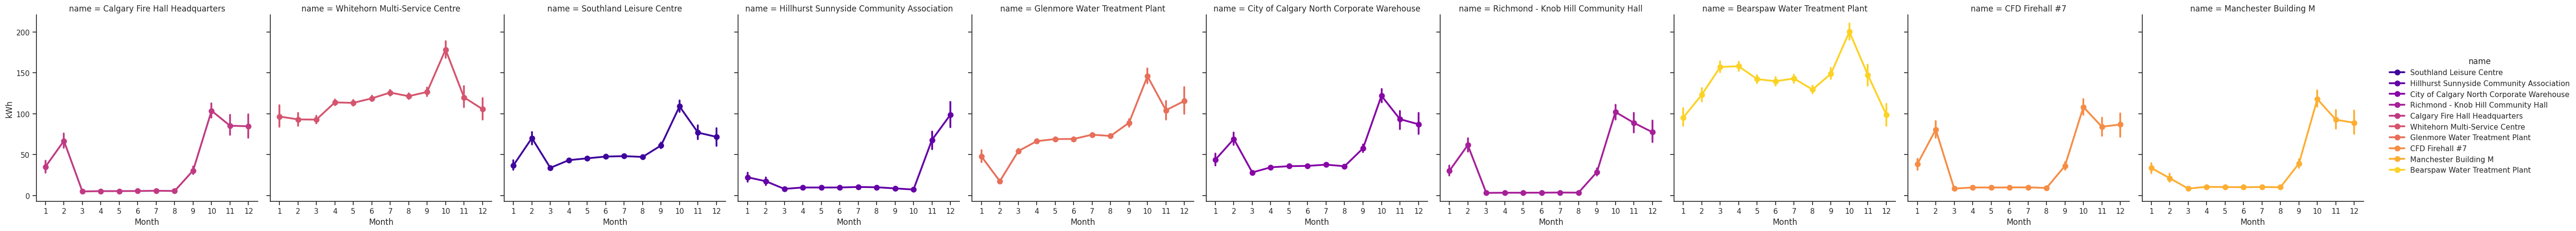

In [ ]:
# kWh production trends
sns.catplot(data = train, x = 'Month', y = "kWh", palette ='plasma', col = 'name', hue = 'name',
             color = c, kind='point') # per facility
plt.show()

Now we see that the graphs make more sense. The range of values is much more compact than the previous one.


# Correlation Analysis

We finished to clean up the dataset so now we can check the overall correlations by plotting the seaborn heatmap:


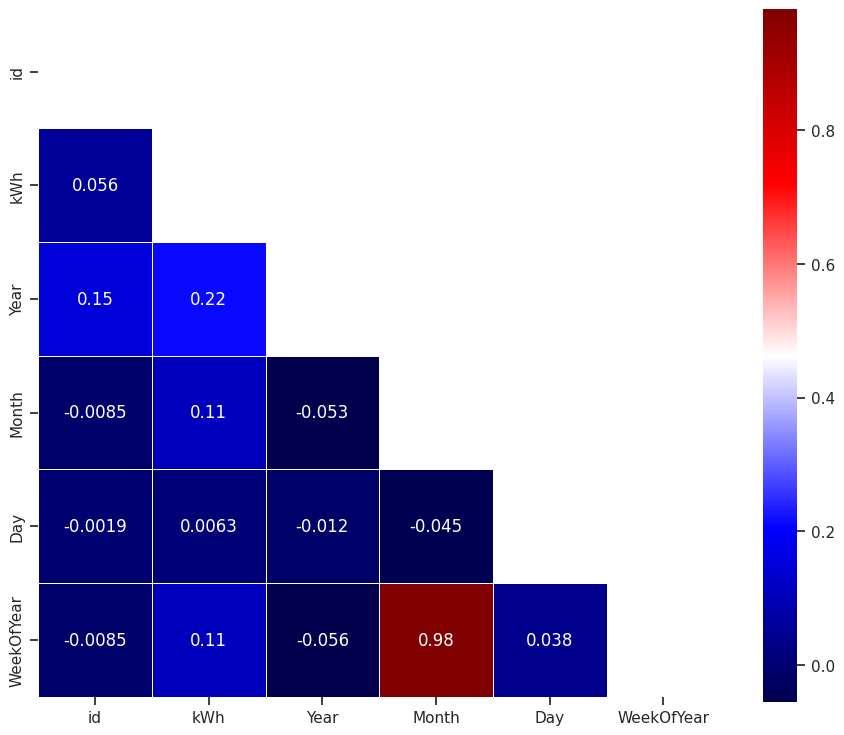

In [ ]:
corr_all = train.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "seismic",annot = True)
plt.show()

From this correlation matrix we can see that:

*   there is a slightly positive correlation between month and kWh
*   there is a slightly positive correlation between year and kWh




# Conclusion from Data Analysis
Although from the correlation matrix there does not appear to be a particular correlation between the month of the year and solar energy production, the graphs show that energy production increases in the winter and fall months.
From the graphs too we can see that the facilities which produce more energy are "Whitehorn Multi-Service Centre" and "Bearspaw Water Treatment Plant	"

# Seasonality
 We are going to pick a facility which represent one with high variations and another one which represent the one with average trends.
 We will pick the Bearspaw Water Treatment Plant with Id 577650 for the first case and the City of Calgary North Corporate Warehouse with Id 331901  for the second case

In [ ]:
# preparation: input should be float type
train['kWh'] = train['kWh'] * 1.0

# store types
bwtp = train[train.name == "Bearspaw Water Treatment Plant"]['kWh'].sort_index(ascending = True) # solve the reverse order
ccncw = train[train.name == "City of Calgary North Corporate Warehouse"]['kWh'].sort_index(ascending = True) # solve the reverse order

print(bwtp)

date
2017-11-21 10:45:00       0.970000
2017-11-21 11:45:00      23.927000
2017-11-21 12:45:00      69.659000
2017-11-21 13:45:00      59.172000
2017-11-21 14:45:00      18.061000
                          ...     
2024-03-05 10:00:00    1358.000000
2024-03-05 11:00:00      43.333779
2024-03-05 12:00:00      43.333779
2024-03-05 13:00:00    2422.000000
2024-03-05 14:00:00     253.000000
Name: kWh, Length: 29210, dtype: float64


<Axes: xlabel='date'>

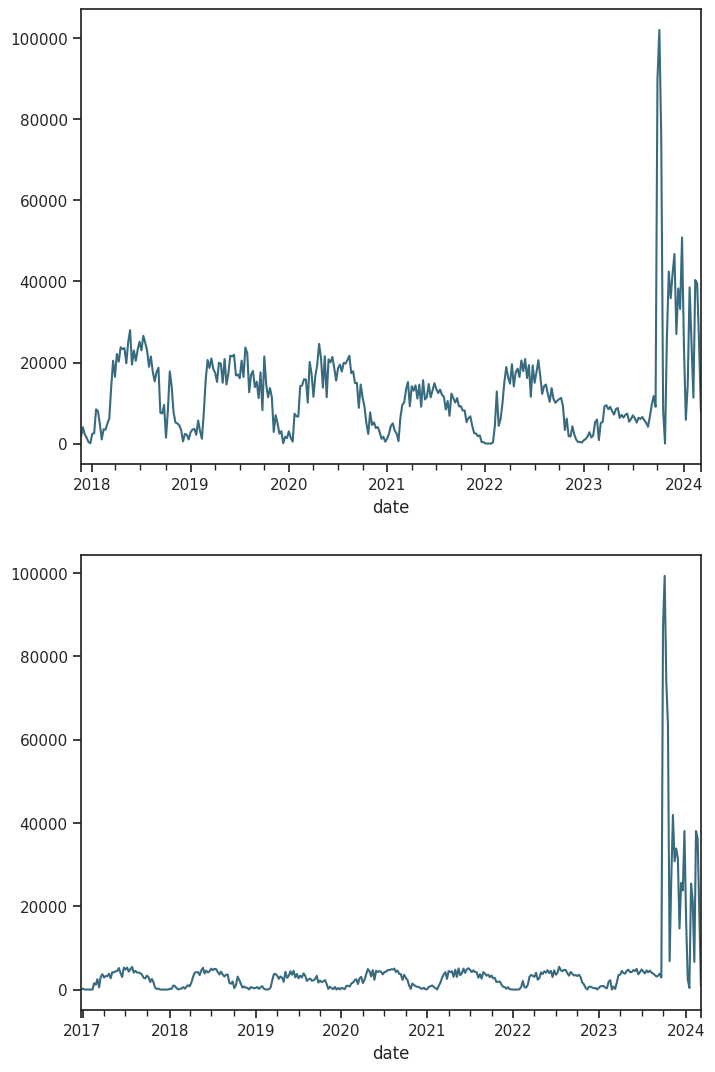

In [ ]:
f,(ax_1,ax_2) = plt.subplots(2,figsize = (8, 13))
bwtp.resample('W').sum().plot(color = c, ax = ax_1)
ccncw.resample('W').sum().plot(color = c, ax = ax_2)


# Yearly Trend

<Axes: xlabel='date'>

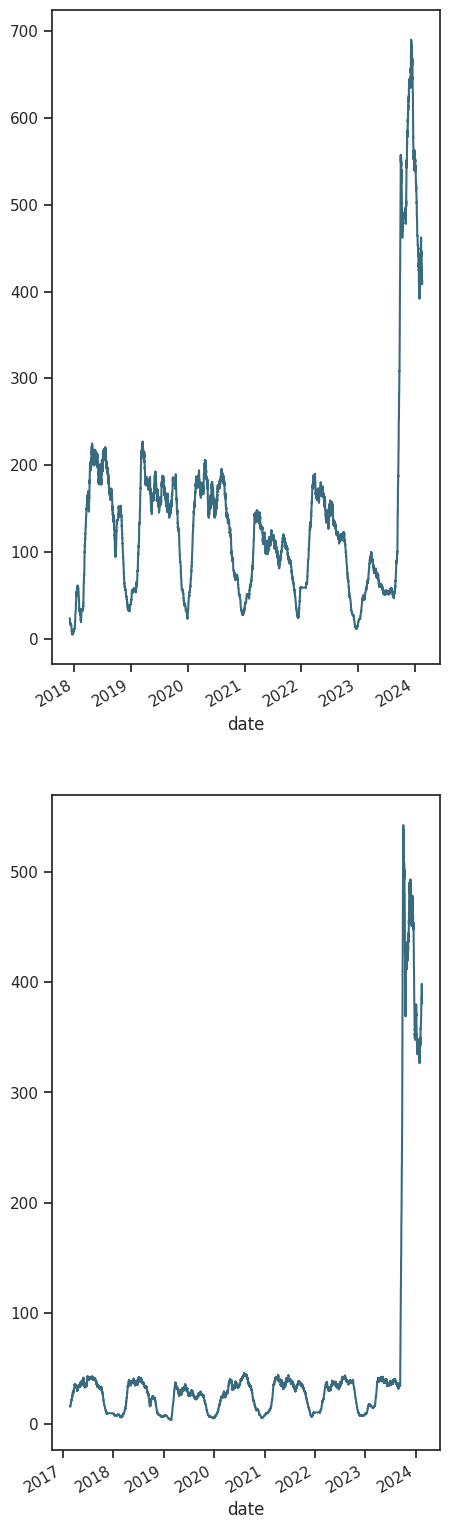

In [ ]:
f,(ax_1,ax_2) = plt.subplots(2,figsize = (5, 8))

plt.subplots_adjust(top=2)

decomposition_a = seasonal_decompose(bwtp, model = 'additive', period = 365)
decomposition_a.trend.plot(color = c, ax = ax_1)

decomposition_b = seasonal_decompose(ccncw, model = 'additive', period = 365)
decomposition_b.trend.plot(color = c, ax = ax_2)

Both the facilities reached a peak of production during the firs two month of 2024. In the other period they follow a seasonal trend.

# Forecasting


In [ ]:
# sales for the store number 1 (StoreType C)
kwh = train[train.name == 'City of Calgary North Corporate Warehouse'].loc[:, ['kWh']]

kwh.head()

,kWh
date,
2017-01-01 12:00:00,0.004
2017-01-02 10:00:00,0.173
2017-01-02 11:00:00,0.457
2017-01-02 12:00:00,0.507
2017-01-02 13:00:00,0.353


In [ ]:
kwh.reset_index(inplace=True)

In [ ]:
kwh.dtypes

date    datetime64[ns]
kWh            float64
dtype: object

In [ ]:
# reverse to the order: from 2013 to 2015
kwh = kwh.sort_index(ascending = False)
# from the prophet documentation every variables should have specific names
kwh = kwh.rename(columns={"date": "ds", "kWh": "y"})
kwh.head()

,ds,y
31501,2024-02-03 17:00:00,2.000000
31500,2024-02-03 16:00:00,100.206327
31499,2024-02-03 15:00:00,100.206327
31498,2024-02-03 14:00:00,100.206327
31497,2024-02-03 13:00:00,793.588495


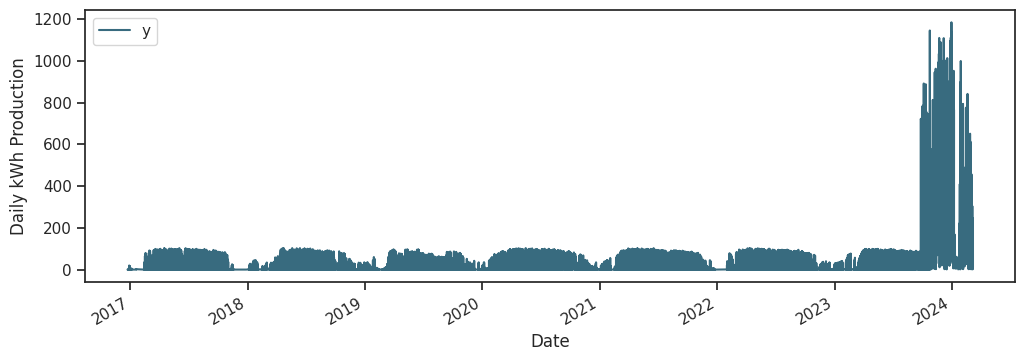

In [ ]:
# plot daily sales
ax = kwh.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily kWh Production')
ax.set_xlabel('Date')
plt.show()

In [ ]:
print(kwh.ds.min())
print(kwh.ds.max())

2016-12-23 09:30:00
2024-03-05 14:00:00


In [ ]:
kwh_train = kwh.loc[kwh["ds"]<"2022-02-01"]
kwh_test = kwh.loc[(kwh["ds"]>="2022-02-01") & (kwh["ds"]<"2023-08-01")]

In [ ]:
# set the uncertainty interval - for future trend changes
model = Prophet(interval_width = 0.95)
model.fit(kwh_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0055k3t/swjmao38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0055k3t/wvhg4npl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11222', 'data', 'file=/tmp/tmpj0055k3t/swjmao38.json', 'init=/tmp/tmpj0055k3t/wvhg4npl.json', 'output', 'file=/tmp/tmpj0055k3t/prophet_modelwpqwltq8/prophet_model-20240326121549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predictions
forecast = model.predict(kwh_test.drop(columns='y'))

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-02-01 09:00:00,1.128072,-35.691747,33.590652
1,2022-02-01 10:00:00,12.630411,-23.861838,46.269410
2,2022-02-01 11:00:00,20.507327,-17.563659,56.590461
3,2022-02-01 12:00:00,24.782527,-9.183828,58.519491
4,2022-02-01 13:00:00,25.727595,-9.331118,59.329071


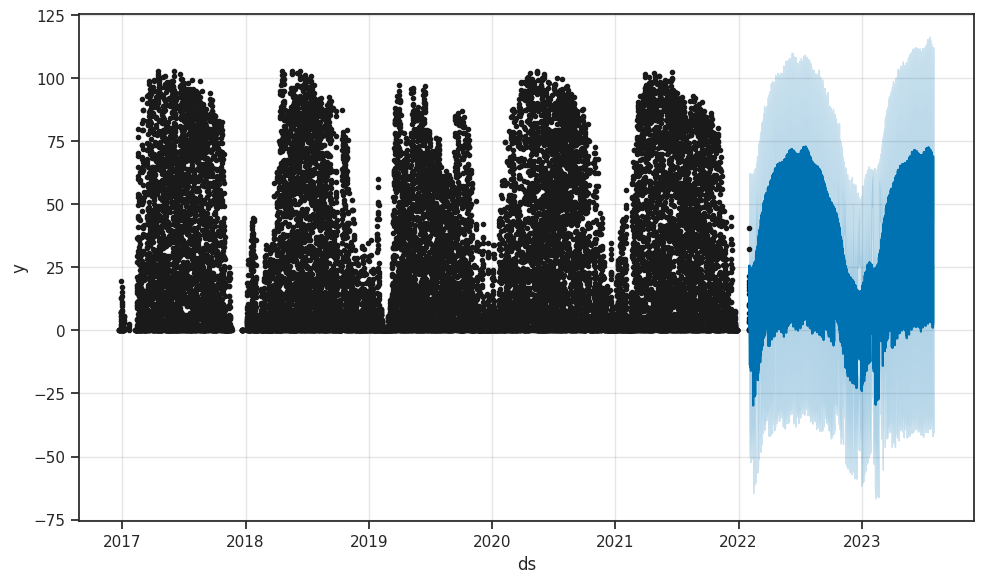

In [ ]:
fig1 = model.plot(forecast)

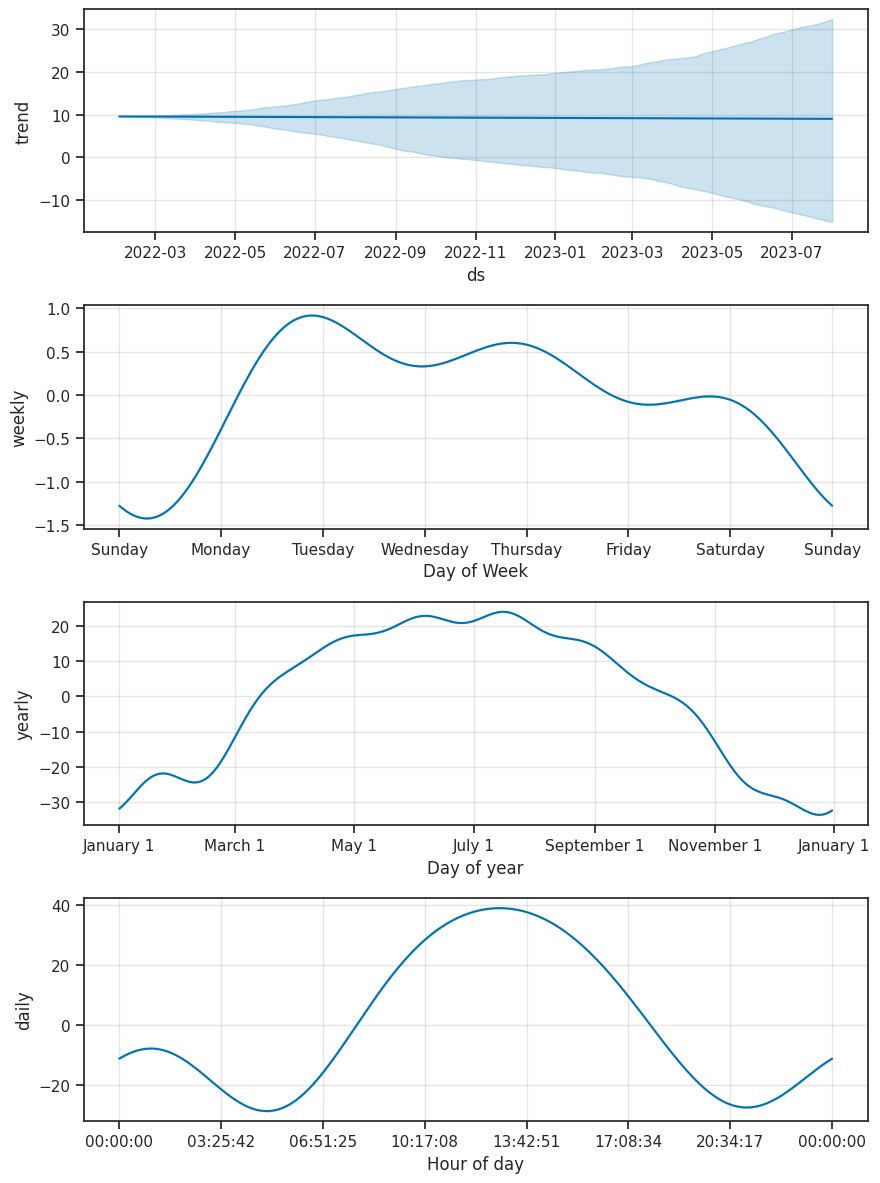

In [ ]:
fig2 = model.plot_components(forecast)

<Axes: title={'center': 'Actual vs Forecast'}, xlabel='ds'>

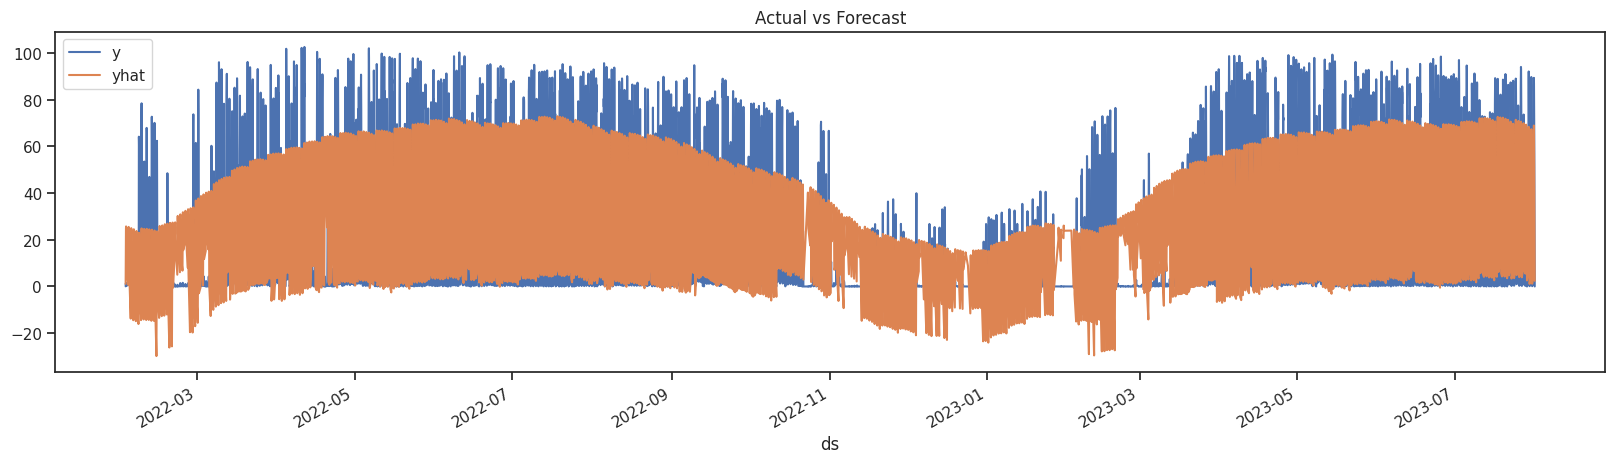

In [ ]:
ax = (kwh_test.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
explained_variance_score_no = explained_variance_score(kwh_test.y, forecast.yhat)
print('explained_variance_score', end=': ')
print(round(explained_variance_score_no,2))

mean_absolute_percentage_error_no = mean_absolute_percentage_error(kwh_test.y, forecast.yhat)
print('mean_absolute_percentage_error', end=': ')
print(round(mean_absolute_percentage_error_no, 2))

mean_absolute_error_no = mean_absolute_error(kwh_test.y, forecast.yhat)
print('mean_absolute_error', end=': ')
print(round(mean_absolute_error_no, 2))

r2_score_no = r2_score(kwh_test.y, forecast.yhat)
print('r2_score', end=': ')
print(round(r2_score_no,3))

explained_variance_score: -0.59
mean_absolute_percentage_error: 249.22
mean_absolute_error: 30.71
r2_score: -0.588


## Strict comparison with univariate serie

In [ ]:
train_kwh_comp = train[train.name == "City of Calgary North Corporate Warehouse"].loc[:, :]

In [ ]:
train_kwh_comp.describe()

,id,kWh,Year,Month,Day,WeekOfYear
count,31502.0,31502.000000,31502.000000,31502.000000,31502.000000,31502.0
mean,331901.0,52.082076,2020.145927,6.414767,15.791347,26.035934
std,0.0,124.484136,2.037833,2.979090,8.810304,12.971795
min,331901.0,0.001000,2016.000000,1.000000,1.000000,1.0
25%,331901.0,3.606000,2018.000000,4.000000,8.000000,16.0
50%,331901.0,20.888000,2020.000000,6.000000,16.000000,26.0
75%,331901.0,58.590000,2022.000000,9.000000,23.000000,36.0
max,331901.0,1184.283722,2024.000000,12.000000,31.000000,53.0


In [ ]:
train_kwh_comp.describe(include='O')

,name,address,public_url,installationDate,uid
count,31502,31502,31502,31502,31502
unique,1,1,2,1,31502
top,City of Calgary North Corporate Warehouse,2340 22 ST NE,https://monitoringpublic.solaredge.com/solared...,2016/12/21,3319012017-01-01 12:00:00
freq,31502,31502,27532,31502,1


In [ ]:
train_kwh_comp = pd.get_dummies(train_kwh_comp)

In [ ]:
corr_all = train_kwh_comp.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "viridis", annot = True)
plt.show()

In [ ]:
import statsmodels.api as sm

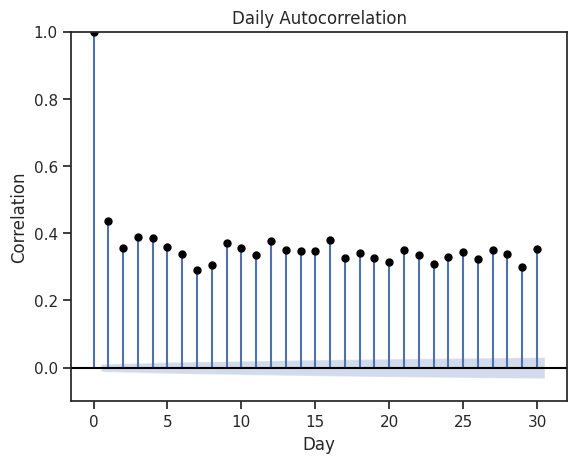

In [ ]:
# Plot autocorrelation
sm.graphics.tsa.plot_acf(train_kwh_comp['kWh'].values, lags=30, alpha=0.05, color = 'black')

# Add title
plt.title("Daily Autocorrelation")
plt.xlabel("Day")
plt.ylabel("Correlation")
plt.ylim(-0.1,1)
plt.show()

In [ ]:
train_kwh_comp['shift_day'] = train_kwh_comp['kWh'].shift(24)

In [ ]:
train_kwh_comp.tail()

,name,id,address,kWh,installationDate,Year,Month,Day,WeekOfYear,shift_day
date,,,,,,,,,,
2024-02-03 13:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,793.588495,2016/12/21,2024,2,3,5,2.0
2024-02-03 14:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,7215.000000,2016/12/21,2024,2,3,5,6.0
2024-02-03 15:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,3234.000000,2016/12/21,2024,2,3,5,946.0
2024-02-03 16:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,661.000000,2016/12/21,2024,2,3,5,3898.0
2024-02-03 17:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,2.000000,2016/12/21,2024,2,3,5,7311.0


In [ ]:
# fill the null values
train_kwh_comp.bfill(axis="rows", inplace=True)
train_kwh_comp.reset_index(inplace=True)


In [ ]:
pred_comp = train_kwh_comp.rename(columns ={"date": "ds", "kWh": "y"} )
pred_comp

,ds,name,id,address,y,installationDate,Year,Month,Day,WeekOfYear,shift_day
0,2017-01-01 12:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.004000,2016/12/21,2017,1,1,52,0.004
1,2017-01-02 10:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.173000,2016/12/21,2017,1,2,1,0.004
2,2017-01-02 11:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.457000,2016/12/21,2017,1,2,1,0.004
3,2017-01-02 12:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.507000,2016/12/21,2017,1,2,1,0.004
4,2017-01-02 13:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.353000,2016/12/21,2017,1,2,1,0.004
...,...,...,...,...,...,...,...,...,...,...,...
31497,2024-02-03 13:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,793.588495,2016/12/21,2024,2,3,5,2.000
31498,2024-02-03 14:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,7215.000000,2016/12/21,2024,2,3,5,6.000
31499,2024-02-03 15:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,3234.000000,2016/12/21,2024,2,3,5,946.000
31500,2024-02-03 16:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,661.000000,2016/12/21,2024,2,3,5,3898.000


In [ ]:
pred_comp = pred_comp.rename(columns ={"date": "ds", "kWh": "y"} )

In [ ]:
pred_comp.y = pred_comp.y * 1.0


In [ ]:
pred_comp.sort_values(by='ds', ascending=True, inplace=True)

In [ ]:
pred_comp.head()

,ds,name,id,address,y,installationDate,Year,Month,Day,WeekOfYear,shift_day
3448,2016-12-23 09:30:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.058,2016/12/21,2016,12,23,51,38.209
3449,2016-12-23 10:30:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.264,2016/12/21,2016,12,23,51,58.948
3450,2016-12-23 11:30:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.127,2016/12/21,2016,12,23,51,72.606
3451,2016-12-23 12:30:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.058,2016/12/21,2016,12,23,51,80.062
3452,2016-12-23 13:30:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.119,2016/12/21,2016,12,23,51,82.101


In [ ]:
print(pred_comp.ds.min())
print(pred_comp.ds.max())

2016-12-23 09:30:00
2024-03-05 14:00:00


In [ ]:
pred_comp_train = pred_comp.loc[pred_comp["ds"]<"2022-02-01"]
pred_comp_test = pred_comp.loc[(pred_comp["ds"]>="2022-02-01")&(pred_comp["ds"]<"2023-08-01")]

In [ ]:
model = Prophet(interval_width = 0.95,
               )
model.add_regressor('shift_day')
model.fit(pred_comp_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_9uzpwv/bhlbugzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9_9uzpwv/h4z22_0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25482', 'data', 'file=/tmp/tmp9_9uzpwv/bhlbugzs.json', 'init=/tmp/tmp9_9uzpwv/h4z22_0c.json', 'output', 'file=/tmp/tmp9_9uzpwv/prophet_modelnwxy1c21/prophet_model-20240325201353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# predictions
forecast = model.predict(pred_comp_test.drop(columns='y'))

In [ ]:
# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-02-01 09:00:00,1.020059,-33.007045,37.677115
1,2022-02-01 10:00:00,12.463771,-23.109864,51.121193
2,2022-02-01 11:00:00,20.349010,-15.083045,54.350464
3,2022-02-01 12:00:00,24.646940,-9.376947,61.757206
4,2022-02-01 13:00:00,25.657313,-8.898776,58.279509


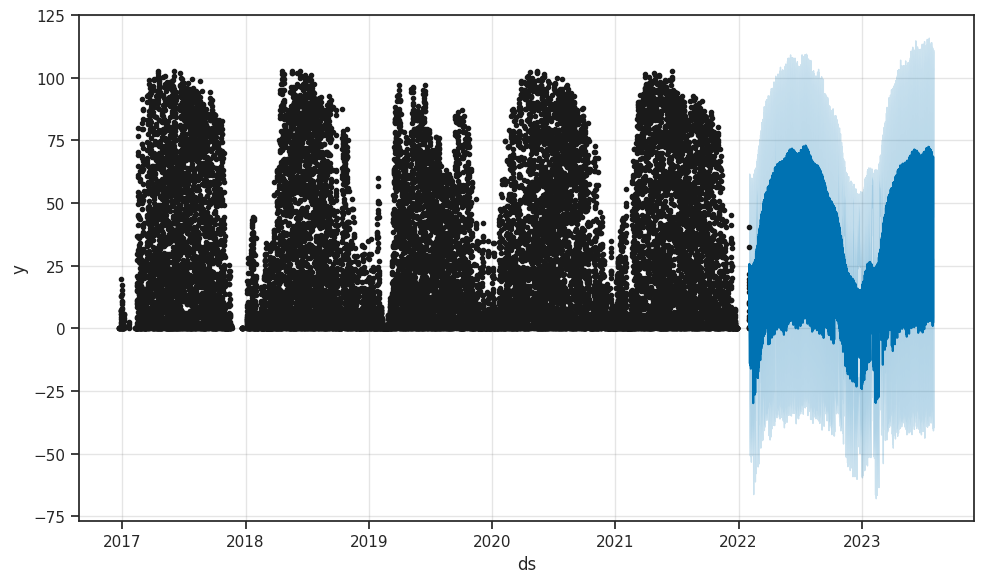

In [ ]:
fig1=model.plot(forecast)

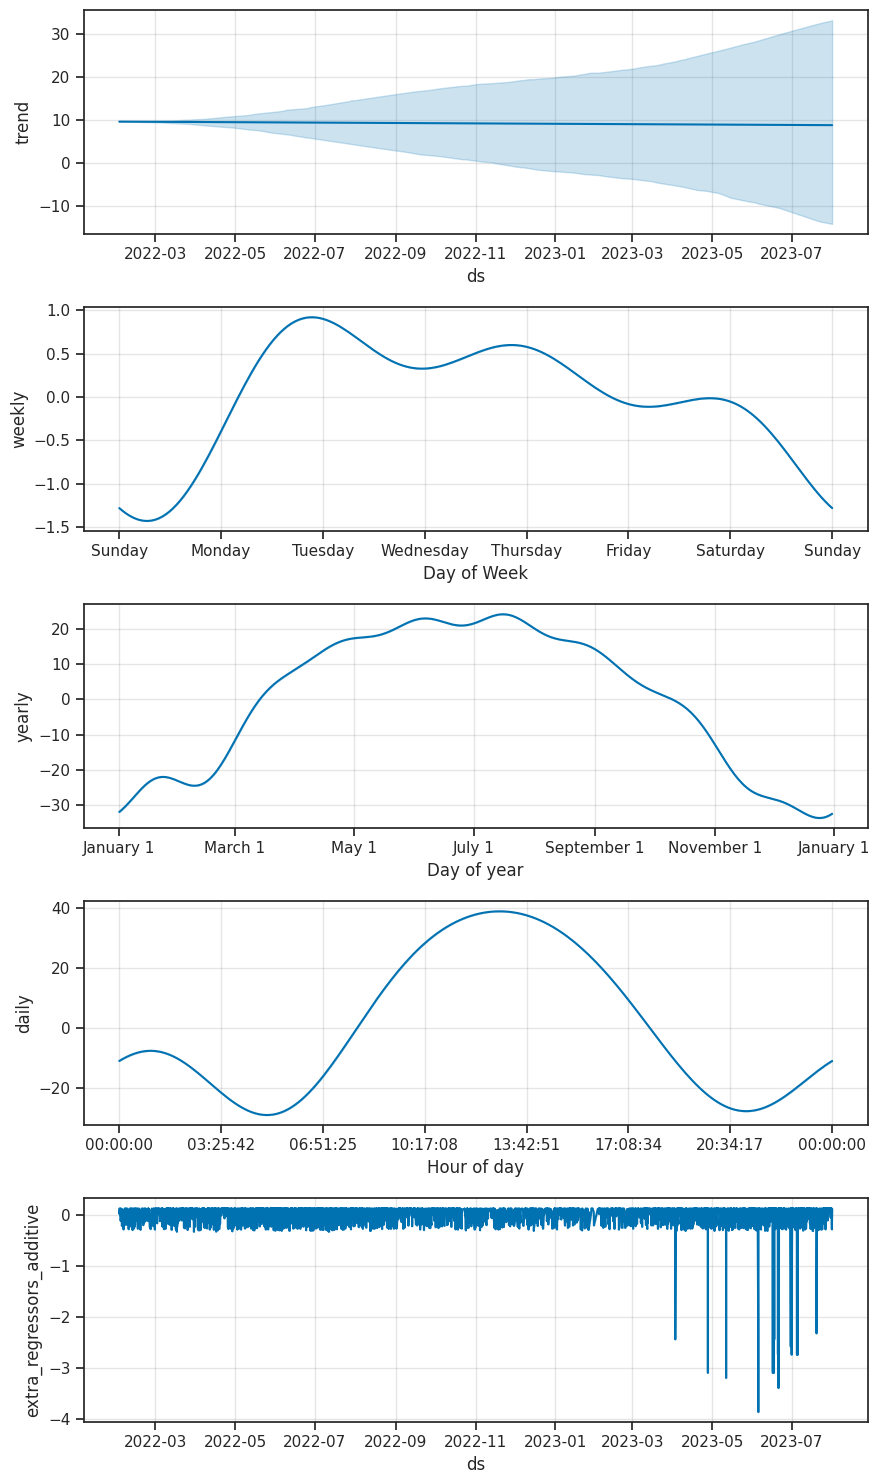

In [ ]:
fig2=model.plot_components(forecast)

<Axes: title={'center': 'Actual vs Forecast'}, xlabel='ds'>

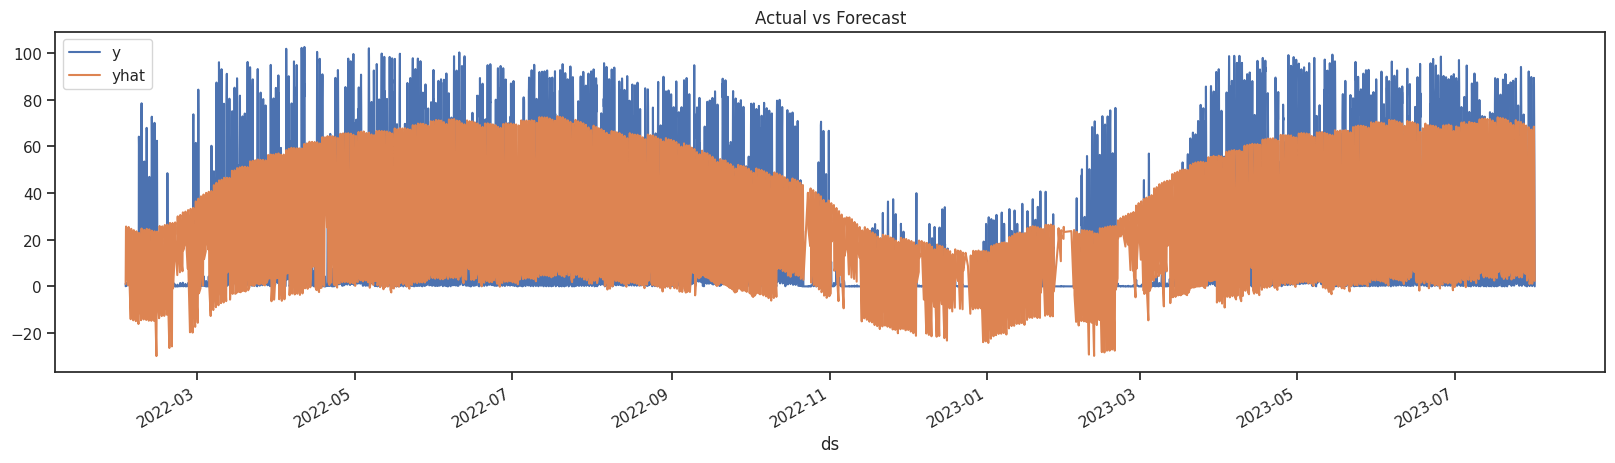

In [ ]:
ax = (pred_comp_test.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
forecast.plot(x='ds',y='yhat',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
pred_comp_test.head()

,ds,name,id,address,y,installationDate,Year,Month,Day,WeekOfYear,shift_day
11703,2022-02-01 09:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.066,2016/12/21,2022,2,1,5,13.453
11704,2022-02-01 10:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.800,2016/12/21,2022,2,1,5,24.630
11705,2022-02-01 11:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,1.333,2016/12/21,2022,2,1,5,22.566
11706,2022-02-01 12:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,0.623,2016/12/21,2022,2,1,5,17.949
11707,2022-02-01 13:00:00,City of Calgary North Corporate Warehouse,331901,2340 22 ST NE,1.133,2016/12/21,2022,2,1,5,2.699


In [ ]:
explained_variance_score_no = explained_variance_score(pred_comp_test.y, forecast.yhat)
print('explained_variance_score', end=': ')
print(round(explained_variance_score_no,2))

mean_absolute_percentage_error_no = mean_absolute_percentage_error(pred_comp_test.y, forecast.yhat)
print('mean_absolute_percentage_error', end=': ')
print(round(mean_absolute_percentage_error_no, 2))

mean_absolute_error_no = mean_absolute_error(pred_comp_test.y, forecast.yhat)
print('mean_absolute_error', end=': ')
print(round(mean_absolute_error_no, 2))

r2_score_no = r2_score(pred_comp_test.y, forecast.yhat)
print('r2_score', end=': ')
print(round(r2_score_no,3))

explained_variance_score: 0.65
mean_absolute_percentage_error: 81.42
mean_absolute_error: 13.47
r2_score: 0.646


In [ ]:
pred_comp_train

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
X_train = pred_comp_train.drop(columns="y")
y_train = pred_comp_train.y
X_test = pred_comp_test.drop(columns="y")
y_test = pred_comp_test.y

In [ ]:
X_train['ds'] = (X_train['ds'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
X_test['ds'] = (X_test['ds'] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

In [ ]:
# Initialize the random forest regressor with some parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the random forest to the training data
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'City of Calgary North Corporate Warehouse'

In [ ]:
# Predict the target variable on the test data
predictions = rf.predict(X_test)

# Evaluate the model using metrics such as mean squared error or R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('MSE:', mse)
print('R2:', r2)

In [ ]:
X_test['ds'] = pd.to_datetime(X_test['ds'], unit='s')

In [ ]:
#ax = (pred_comp_test.plot(x='ds',y='y',figsize=(20,5),title='Actual Vs Forecast'))
# Plotting the actual and predicted values
plt.plot(X_test.ds, y_test, label='Actual')
plt.plot(X_test.ds, predictions, label='Predicted')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
# y_test
fig.add_trace(go.Scatter(x = X_test.ds, y = y_test, name = 'x_test'))
#fig.show()

# y_pred_test
fig.add_trace(go.Scatter(x = X_test.ds, y = predictions, name = 'x_pred_test'))
fig.show()